# Milk Quality Prediction

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

### Before we begin
* The .csv file has the column Fat ending in a whitespace so we remove it
* Temperature is spelled incorrectly (Temprature) so we correct it

In [3]:
df = pd.read_csv('milknew.csv')

In [3]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
print(f'Data Frame Shape (rows, columns): {df.shape}')
print(f'The Dataset has {df.shape[0]} entries')

Data Frame Shape (rows, columns): (1059, 8)
The Dataset has 1059 entries


In [6]:
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
df.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [8]:
df.dtypes

pH             float64
Temperature      int64
Taste            int64
Odor             int64
Fat              int64
Turbidity        int64
Colour           int64
Grade           object
dtype: object

In [4]:
df["Taste"].replace({0: False, 1: True}, inplace=True)
df["Temperature"].replace({0: False, 1: True}, inplace=True)
df["Fat"].replace({0: False, 1: True}, inplace=True)
df["Turbidity"].replace({0: False, 1: True}, inplace=True)
df["Odor"].replace({0: False, 1: True}, inplace=True)

df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,True,False,True,False,254,high
1,6.6,36,False,True,False,True,253,high
2,8.5,70,True,True,True,True,246,low
3,9.5,34,True,True,False,True,255,low
4,6.6,37,False,False,False,False,255,medium


### Grades plot

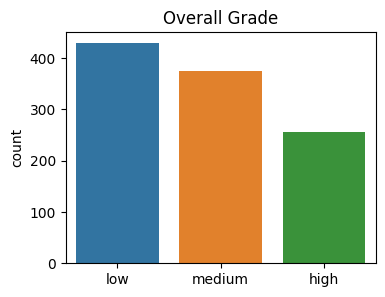

In [6]:
plt.figure(figsize=(4, 3))
plt.title("Overall Grade")
grade_plot = sns.countplot(x="Grade", data=df, order=["low", "medium", "high"])
grade_plot.set(xlabel=None)
plt.show()

### Taste, Odor, Fat, Turbidity plot

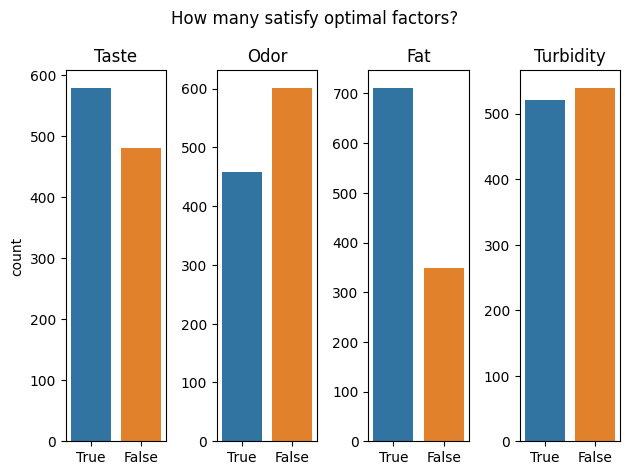

In [7]:
plt.rcParams["figure.autolayout"] = True
f, a = plt.subplots(1, 4)
f.suptitle("How many satisfy optimal factors?")
a[0].set_title("Taste")
a[1].set_title("Odor")
a[2].set_title("Fat")
a[3].set_title("Turbidity")

order = [True, False]
taste_graph = sns.countplot(x="Taste", data=df, ax=a[0], order=order)
odor_graph = sns.countplot(x="Odor", data=df, ax=a[1], order=order)
fat_graph = sns.countplot(x="Fat", data=df, ax=a[2], order=order)
turbidity_graph = sns.countplot(x="Turbidity", data=df, ax=a[3], order=order)

a[0].set(xlabel = None)
for i in range(1, 4):
    a[i].set(xlabel = None)
    a[i].set_ylabel(ylabel=None) 
plt.show()

### pH, temperature, color historgrams

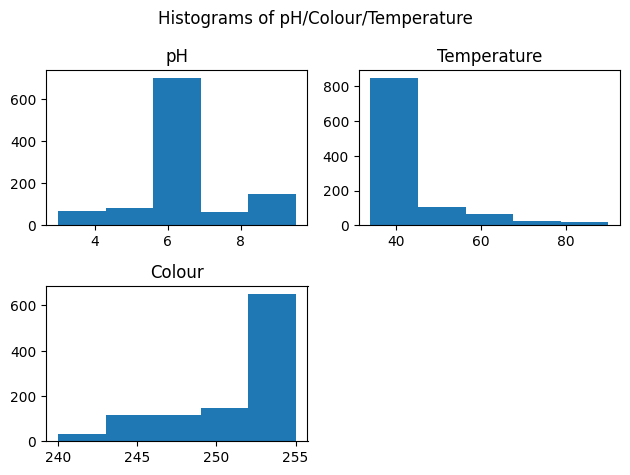

In [8]:
df.hist(bins=5, grid=False)

plt.suptitle("Histograms of pH/Colour/Temperature")
plt.tight_layout()
plt.show()

### Individual Factors

In [4]:
df1 = df.copy()
df1["Grade"].replace({"high": 2, "medium": 1, "low": 0}, inplace=True)

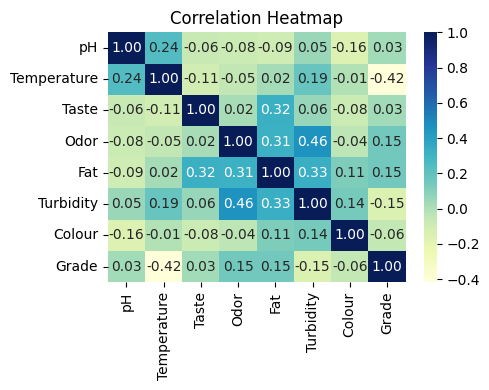

In [67]:
f, a = plt.subplots(1, 1, figsize=(5,4))
a.set_title("Correlation Heatmap")

corr_plot = sns.heatmap(data=df1.corr(), ax=a, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

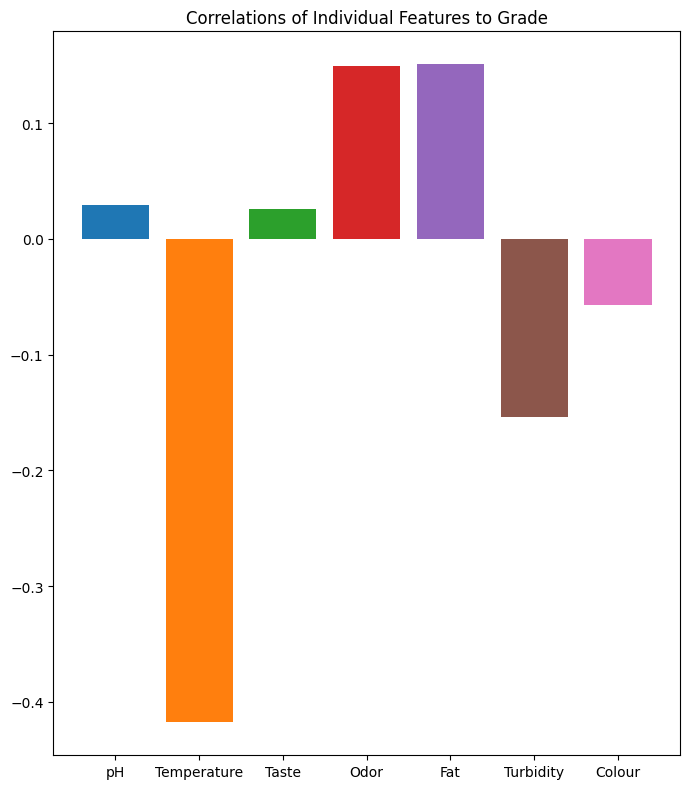

In [193]:
f, a = plt.subplots(1, 1, figsize=(7,8))
a.set_title("Correlations of Individual Features to Grade")
## ax = df1.corr()["Grade"].plot(kind="bar") # Run uncommented first and then commented
p = plt.bar(df1.columns.values[0:-1], ax.containers[0].datavalues[0:-1], color=sns.color_palette())

## Logistic Regression

Accuracy is 76.6%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       116
           1       0.79      0.89      0.83        96
           2       0.59      0.55      0.57        53

    accuracy                           0.77       265
   macro avg       0.73      0.73      0.73       265
weighted avg       0.76      0.77      0.76       265



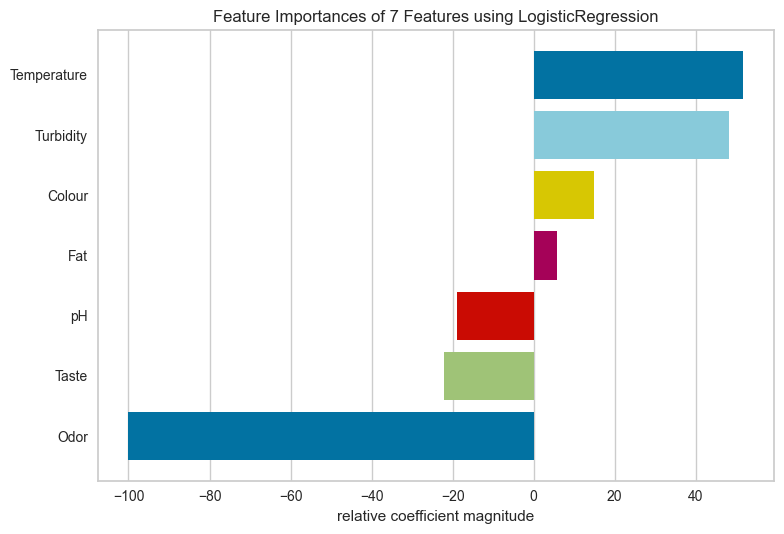

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
fi = FeatureImportances(lr)
fi.fit(X, y)
fi.show()

import joblib
with open('./models/LR.joblib', 'wb') as f:
    joblib.dump(lr,f)

## Support Vector Machine

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = SVC(random_state=40, probability=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import joblib
with open('./models/SVM.joblib', 'wb') as f:
    joblib.dump(lr,f)

Accuracy is 56.23%
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       116
           1       0.45      1.00      0.62        96
           2       0.00      0.00      0.00        53

    accuracy                           0.56       265
   macro avg       0.48      0.49      0.42       265
weighted avg       0.60      0.56      0.50       265



## K-Nearest Neighbor

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = KNeighborsClassifier()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import joblib
with open('./models/KNN.joblib', 'wb') as f:
    joblib.dump(lr,f)

Accuracy is 98.87%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       116
           1       0.98      0.99      0.98        96
           2       0.98      0.98      0.98        53

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



## Decision Trees 

Accuracy is 99.25%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       116
           1       0.98      1.00      0.99        96
           2       1.00      0.98      0.99        53

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



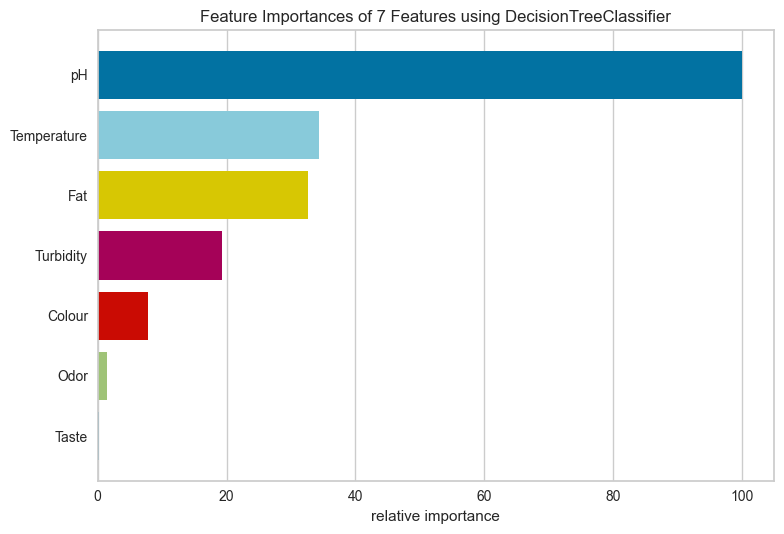

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = DecisionTreeClassifier(random_state=40)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
fi = FeatureImportances(lr)
fi.fit(X, y)
fi.show()

import joblib
with open('./models/DT.joblib', 'wb') as f:
    joblib.dump(lr,f)

## Random Forest

Accuracy is 99.25%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       116
           1       0.98      1.00      0.99        96
           2       1.00      0.98      0.99        53

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



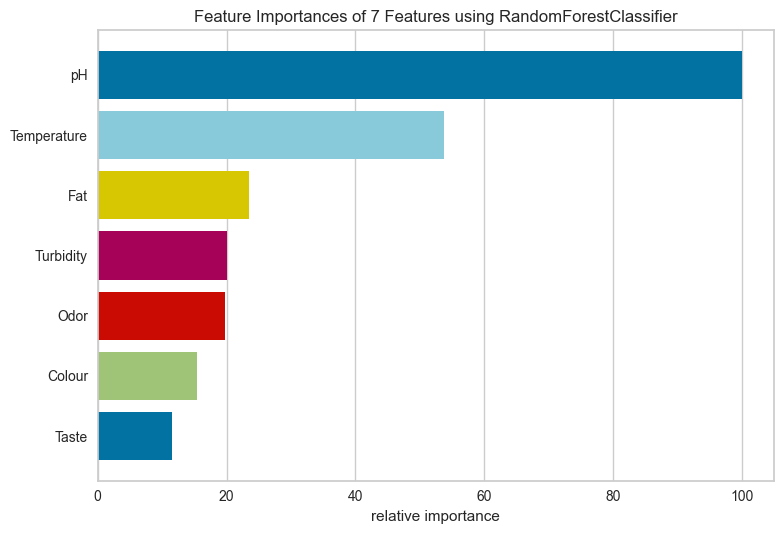

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = RandomForestClassifier(random_state=40)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
fi = FeatureImportances(lr)
fi.fit(X, y)
fi.show()

import joblib
with open('./models/rf.joblib', 'wb') as f:
    joblib.dump(lr,f)

## Multi-layer Perceptron

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
lr = MLPClassifier(random_state=40)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))


import joblib
with open('./models/mlpc.joblib', 'wb') as f:
    joblib.dump(lr,f)

Accuracy is 80.38%
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       116
           1       0.80      0.94      0.87        96
           2       0.62      0.64      0.63        53

    accuracy                           0.80       265
   macro avg       0.78      0.78      0.78       265
weighted avg       0.81      0.80      0.80       265



## SVM (Tuned)
We didn't get an accurate model last time, so let's tune the hyperparameters by validatating with k-fold cross validation, and finding the best parameters with grid search 

Best: 93.74 with {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

	More results:
83.91 with: {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}
67.7 with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
62.41 with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
43.91 with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
93.74 with: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
60.24 with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
54.48 with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
44.0 with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
87.63 with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
51.37 with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
53.0 with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
40.51 with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
81.77 with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
42.27 with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
40.51 with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
40.51 with: {'C': 0.1, 'gamma': 

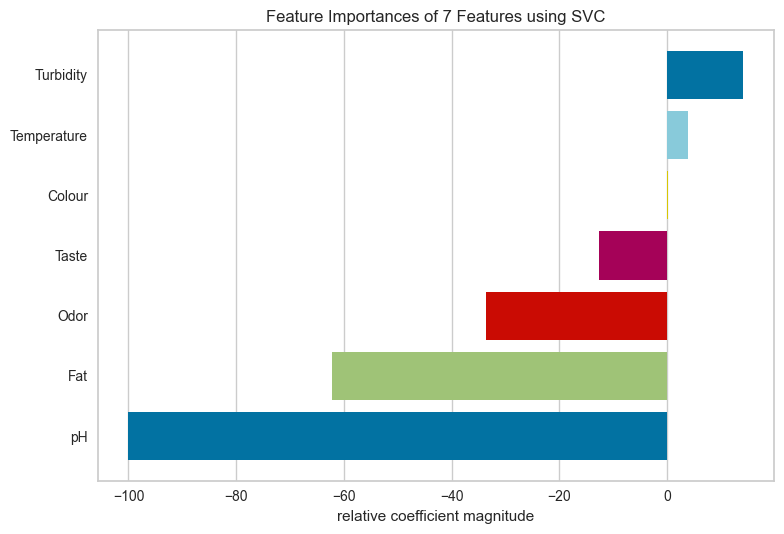

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV



X = df1.drop(columns="Grade", axis=1)
y = df1.Grade
model = SVC(random_state=40, probability=True)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel, C=C, gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=40)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)


print(f"Best: {round(grid_result.best_score_ * 100, 2)} with {grid_result.best_params_}")
print("\n\tMore results:")
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print(f"{round(mean * 100, 2)} with: {param}")

model_tuned = SVC(random_state=40, probability=True, C=grid_result.best_params_["C"], gamma=grid_result.best_params_["gamma"], kernel=grid_result.best_params_["kernel"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
model_tuned.fit(X_train, y_train)
preds = model_tuned.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
fi = FeatureImportances(model_tuned)
fi.fit(X, y)
fi.show()

import joblib
with open('./models/tuned_svm.joblib', 'wb') as f:
    joblib.dump(model_tuned,f)


## TPOT AutoML

In [21]:
from tpot import TPOTClassifier

In [22]:
AutoML = TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [23]:
#AutoML.fit(X_train, y_train)

In [24]:
#AutoML.export("pipeline.py")

Accuracy is 99.25%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       116
           1       0.98      1.00      0.99        96
           2       1.00      0.98      0.99        53

    accuracy                           0.99       265
   macro avg       0.99      0.99      0.99       265
weighted avg       0.99      0.99      0.99       265



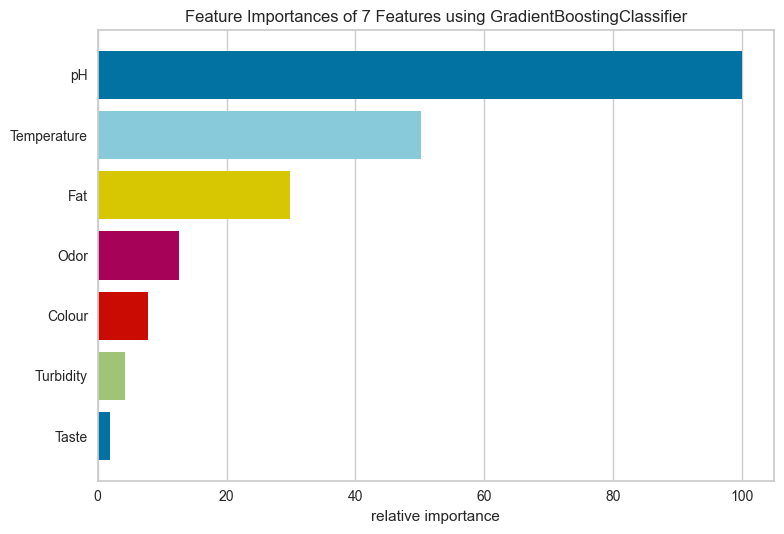

<AxesSubplot: title={'center': 'Feature Importances of 7 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


X = df1.drop(columns="Grade", axis=1)
y = df1.Grade

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)
mdl = GradientBoostingClassifier(learning_rate=1.0, max_depth=6, max_features=0.1, min_samples_leaf=9, min_samples_split=16, n_estimators=100, subsample=0.55, random_state=40)
mdl.fit(X_train, y_train)
preds = mdl.predict(X_test)

print(f'Accuracy is {round(100 * accuracy_score(y_test, preds), 2)}%')
print(classification_report(y_test, preds))

import yellowbrick
from yellowbrick.model_selection import FeatureImportances
fi = FeatureImportances(mdl)
fi.fit(X, y)
fi.show()

In [26]:
# Save our models
import joblib
with open('./models/tpot.joblib', 'wb') as f:
    joblib.dump(mdl,f)